## Topic Modeling Using LDA

In [ ]:

import spacy
nlp = spacy.load('en_core_web_sm')


import gensim

import pandas as pd
from gensim import corpora

import re

In [2]:
nlp.vocab['star'].is_stop = True
nlp.vocab['stars'].is_stop = True
nlp.vocab['good'].is_stop = True

In [3]:
reviews = pd.read_csv('amazon_ratings.csv')


In [4]:
reviews['star_rating'] = reviews['star_rating'].apply(lambda x:1 if x > 4 else 0)

In [5]:
negative_sentiments = reviews[reviews['star_rating'] == 0]
print(negative_sentiments.shape[0])

274


In [7]:
negative_sentiments['Final review'] = negative_sentiments['review_headline'] + ' ' + negative_sentiments['review_body']
negative_sentiments['Final review'] = negative_sentiments['Final review'].str.replace("[^a-zA-Z#]", " ")

In [8]:
negative_sentiments['Final Text'] = ''
for i in range(negative_sentiments.shape[0]):
    temp = []
    document = nlp(negative_sentiments['Final review'].iloc[i].lower())
    for j in document:
        if j.is_stop!=True and j.is_punct!=True:
            temp.append(j.lemma_)
    negative_sentiments['Final Text'].iloc[i] = temp


In [9]:
def topic_modelling(text):
    dictionary = corpora.Dictionary(text)
    doc_term_matrix = [dictionary.doc2bow(rev) for rev in text]
    LDA = gensim.models.ldamodel.LdaModel
    lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, 
                    num_topics = 1, random_state = 19, passes = 50)
    temp = re.findall('[a-z]*',lda_model.print_topics()[0][1])
    tags = [x for x in temp if x]
    return tags

In [10]:
negative_sentiments['Final Text'] = negative_sentiments['Final Text'].apply(lambda x:' '.join(x))
negative_sentiments.head()

,star_rating,review_headline,review_body,Final review,Final Text
0,0,Four Stars,Very good quality. So far so good.,Four Stars Very good quality So far so good,quality far
3,0,they work,They charge my wife's phone,they work They charge my wife s phone,work charge wife s phone
6,0,One Star,It broke less than a month. Don't buy them.,One Star It broke less than a month Don t buy...,break month don t buy
9,0,Had this for almost three months and it starte...,Had this for almost three months and it starte...,Had this for almost three months and it starte...,month start month start act visual sign...
15,0,Three Stars,"Quality is ok, but the cables tend to fray aro...",Three Stars Quality is ok but the cables tend...,quality ok cable tend fray connection end fa...


In [11]:
negative_sentiments['Review Tags'] = negative_sentiments['Final Text'].apply(lambda x: topic_modelling([x.split(' ')]))
negative_sentiments.head()

,star_rating,review_headline,review_body,Final review,Final Text,Review Tags
0,0,Four Stars,Very good quality. So far so good.,Four Stars Very good quality So far so good,quality far,"[far, quality]"
3,0,they work,They charge my wife's phone,they work They charge my wife s phone,work charge wife s phone,"[charge, phone, s, wife, work]"
6,0,One Star,It broke less than a month. Don't buy them.,One Star It broke less than a month Don t buy...,break month don t buy,"[break, buy, don, month, t]"
9,0,Had this for almost three months and it starte...,Had this for almost three months and it starte...,Had this for almost three months and it starte...,month start month start act visual sign...,"[start, month, charge, sign, randomly, stop, b..."
15,0,Three Stars,"Quality is ok, but the cables tend to fray aro...",Three Stars Quality is ok but the cables tend...,quality ok cable tend fray connection end fa...,"[cable, connection, end, fairly, fray, ok, qua..."


In [12]:
from functools import reduce

final_list = reduce(lambda x,y :x+y ,negative_sentiments['Review Tags'].dropna().values.tolist())
final_list

['far',
 'quality',
 'charge',
 'phone',
 's',
 'wife',
 'work',
 'break',
 'buy',
 'don',
 'month',
 't',
 'start',
 'month',
 'charge',
 'sign',
 'randomly',
 'stop',
 'broken',
 'cord',
 'phone',
 'cable',
 'connection',
 'end',
 'fairly',
 'fray',
 'ok',
 'quality',
 'quickly',
 'tend',
 'work',
 'cable',
 'far',
 'find',
 'hard',
 'lightning',
 'long',
 'time',
 'couple',
 'month',
 'stop',
 'work',
 'work',
 'cord',
 'didn',
 'get',
 'stop',
 'suck',
 't',
 'car',
 'send',
 'purchase',
 'wire',
 'usb',
 't',
 'wall',
 'doesn',
 'charger',
 'charge',
 'iphone',
 'white',
 'wire',
 'company',
 'quick',
 'expect',
 'order',
 'come',
 'thing',
 'time',
 's',
 'second',
 'dotey',
 'heavey',
 'iphone',
 'perfectly',
 'work',
 'give',
 'go',
 'post',
 'update',
 'wrong',
 'cook',
 'iphone',
 'want',
 'thank',
 'apart',
 'cheap',
 'fall',
 'money',
 'open',
 'receive',
 'right',
 'worth',
 'worthless',
 'great',
 'cord',
 'work',
 'charge',
 'month',
 'stop',
 'use',
 'br',
 'charger',
 

In [13]:
dic = {}
for i in final_list:
    if i not in dic.keys():
        dic[i] = 1
    else:
        dic[i] = dic[i] + 1

In [14]:
df = pd.Series(dic)
df = df.drop(['t','s','br'])
df = df.sort_values(ascending = False)
df.head(20)

work       115
cable       95
month       47
buy         36
cord        35
stop        34
great       34
iphone      34
charge      33
phone       31
apple       31
product     29
quality     27
week        24
use         22
time        20
price       18
plug        18
like        15
break       14
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


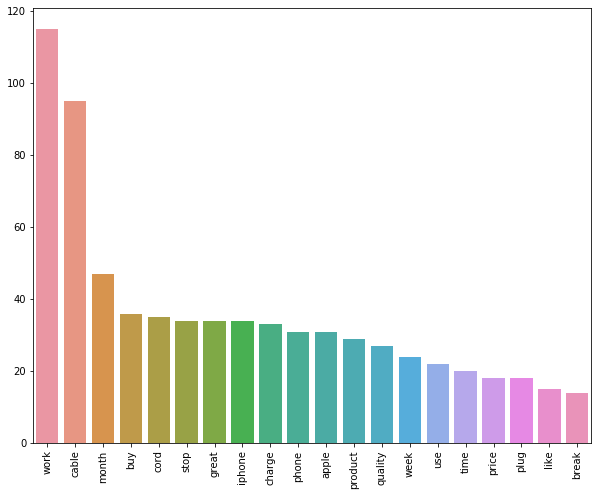

In [16]:
fig = plt.figure(figsize = (10,8))
sns.barplot(df.head(20).index.values.tolist(), df.head(20).values.tolist())
plt.xticks(rotation = 90)
plt.show()

In [6]:
negative_sentiments = negative_sentiments[['star_rating','review_headline','review_body']]
negative_sentiments.head()

,star_rating,review_headline,review_body
0,0,Four Stars,Very good quality. So far so good.
3,0,they work,They charge my wife's phone
6,0,One Star,It broke less than a month. Don't buy them.
9,0,Had this for almost three months and it starte...,Had this for almost three months and it starte...
15,0,Three Stars,"Quality is ok, but the cables tend to fray aro..."


In [1]:
import warnings
warnings.filterwarnings("ignore")


import spacy
nlp = spacy.load('en_core_web_sm')


import gensim

import pandas as pd
from gensim import corpora

import re